#IMPORTING THE REQUIRED LIBRARIES

In [ ]:
#IMPORTING THE REQUIRED LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler


#LOADING THE DATASET AND DROPING THE ID COLUMN

In [ ]:
#LOADING THE DATASET AND DROPING THE ID COLUMN

dataset = pd.read_csv("Iris copy.csv")
dataset = dataset.drop('Id', axis=1)

#CHECKING FOR ANY NULL VALUES

In [4]:
dataset.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

#SEPARATING INPUT DATA AND OUTPUT DATA 

In [5]:
X = dataset.iloc[:, :-1]
y = dataset["Species"]

#ENCODING THE OUTPUT DATA USING LABEL ENCODER

In [6]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

#SCALING THE INPUT DATA USING STANDARD SCALER

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


#SPLITING DATA INTO TRAINING AND TESTING SETS

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

In [ ]:

# Creating and training model 1
model1 = MLPClassifier(hidden_layer_sizes=(10,), max_iter=500, random_state=1)
model1.fit(X_train, y_train)


C:\Users\siddarth\AppData\Roaming\Python\Python313\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


,hidden_layer_sizes,"(10,)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,500
,shuffle,True
,random_state,1


In [10]:
# Save weights and biases from model1
weights = model1.coefs_
biases = model1.intercepts_

In [11]:
acc1 = model1.score(X_test, y_test)

In [12]:
#  Creating model 2 with same weights

model2 = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1, warm_start=True, random_state=2)
model2.fit(X_train, y_train)  # Initial fit to initialize weights
model2.coefs_ = weights
model2.intercepts_ = biases
acc2 = model2.score(X_test, y_test)

C:\Users\siddarth\AppData\Roaming\Python\Python313\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


In [13]:
#Creating model 3 with same weights

model3 = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1, warm_start=True, random_state=3)
model3.fit(X_train, y_train)
model3.coefs_ = weights
model3.intercepts_ = biases
acc3 = model3.score(X_test, y_test)

C:\Users\siddarth\AppData\Roaming\Python\Python313\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


In [14]:
# Printing accuracy results in percentage
print("Accuracy of Model 1: {:.2f}%".format(acc1 * 100))
print("Accuracy of Model 2 (same weights): {:.2f}%".format(acc2 * 100))
print("Accuracy of Model 3 (same weights): {:.2f}%".format(acc3 * 100))

Accuracy of Model 1: 100.00%
Accuracy of Model 2 (same weights): 100.00%
Accuracy of Model 3 (same weights): 100.00%


#TAKING SAMPLE INPUT AND PREDICTING IT

In [15]:
#  Sample inputs (each has 4 features like real Iris data)
samples = [
    [5.1, 3.5, 1.4, 0.2],  
    [6.7, 3.0, 5.2, 2.3], 
    [5.9, 3.0, 4.2, 1.5]   
]

samples_scaled = scaler.transform(samples)


print("\nPredictions from all 3 models:\n")

for i in range(len(samples)):
    sample = samples[i]
    sample_scaled = [samples_scaled[i]]  

    pred1 = model1.predict(sample_scaled)[0]
    pred2 = model2.predict(sample_scaled)[0]
    pred3 = model3.predict(sample_scaled)[0]

    # Converting numeric predictions back to species names
    species1 = le.inverse_transform([pred1])[0]
    species2 = le.inverse_transform([pred2])[0]
    species3 = le.inverse_transform([pred3])[0]

    print("Input Sample:", sample)
    print("Model 1 Prediction:", species1)
    print("Model 2 Prediction:", species2)
    print("Model 3 Prediction:", species3)
    print("-" * 40)


Predictions from all 3 models:

Input Sample: [5.1, 3.5, 1.4, 0.2]
Model 1 Prediction: Iris-setosa
Model 2 Prediction: Iris-setosa
Model 3 Prediction: Iris-setosa
----------------------------------------
Input Sample: [6.7, 3.0, 5.2, 2.3]
Model 1 Prediction: Iris-virginica
Model 2 Prediction: Iris-virginica
Model 3 Prediction: Iris-virginica
----------------------------------------
Input Sample: [5.9, 3.0, 4.2, 1.5]
Model 1 Prediction: Iris-versicolor
Model 2 Prediction: Iris-versicolor
Model 3 Prediction: Iris-versicolor
----------------------------------------


C:\Users\siddarth\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [16]:
# Save original weights
original_W1 = model1.coefs_[0].copy()
original_W2 = model1.coefs_[1].copy()


In [17]:
# === User Input Section ===
print("Choose weight matrix (W1 for input→hidden, W2 for hidden→output):")
layer_choice = input("Enter W1 or W2: ").strip().upper()

print(layer_choice)

Choose weight matrix (W1 for input→hidden, W2 for hidden→output):
W1


In [ ]:


# Get valid indices
i = int(input("Enter row index i: "))
j = int(input("Enter column index j: "))

delta = float(input("Enter range delta (±delta from original weight): "))  # e.g., 1.0
n_points = int(input("Enter number of steps (e.g., 100): "))  # e.g., 100
  



i: 2 j: 1 delta: 1.0 n_points: 100


In [19]:
# Pick a sample input and true label for testing
sample = X_test[0].reshape(1, -1)
true_label = y_test[0]



# Get the original value of the selected weight

w_orig = original_W1[i][j] if layer_choice == "W1" else original_W2[i][j]


weight_range = np.linspace(w_orig - delta, w_orig + delta, n_points)
mse_values = []


In [20]:


if layer_choice == "W1":
    if i >= 4 or j >= 10:
        print("Invalid index for W1. Max i=3, j=9")
        exit()
elif layer_choice == "W2":
    if i >= 10 or j >= 3:
        print("Invalid index for W2. Max i=9, j=2")
        exit()
else:
    print("Invalid layer choice. Must be W1 or W2.")
    exit()


In [21]:
# Weight testing loop
for w in weight_range:
    model1.coefs_[0] = original_W1.copy()
    model1.coefs_[1] = original_W2.copy()

    if layer_choice == "W1":
        model1.coefs_[0][i][j] = w
    else:
        model1.coefs_[1][i][j] = w

    pred = model1.predict_proba(sample)[0]  # class 1 probability

     # Convert true label to one-hot
    true_one_hot = np.zeros(3)
    true_one_hot[true_label] = 1



    # Calculate MSE between predicted probs and true label
    mse = mean_squared_error(true_one_hot, pred)
    mse_values.append(mse)


    # probabilities.append(float(proba))

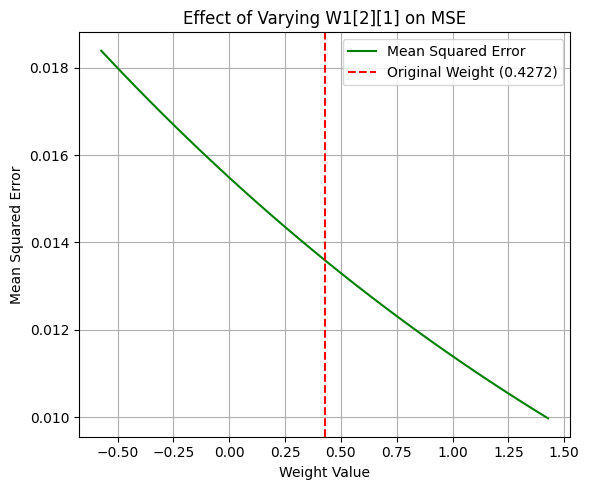

In [ ]:
# --- PLOTING THE GRAPH ---
plt.figure(figsize=(6, 5))
plt.plot(weight_range, mse_values, color='green', label='Mean Squared Error')
plt.axvline(x=w_orig, color='red', linestyle='--', label=f'Original Weight ({w_orig:.4f})')
plt.xlabel("Weight Value")
plt.ylabel("Mean Squared Error")
plt.title(f"Effect of Varying {layer_choice}[{i}][{j}] on MSE")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()